<a href="https://colab.research.google.com/github/oeunji/HW1/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%9D%91%EC%9A%A9%EB%B0%8F%EC%8B%A4%EC%8A%B5_2022136087_%EC%9D%B4%EC%9D%80%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 폴더 생성
!mkdir -p datasets/Stanford_dogs

# Stanford Dogs 데이터셋 다운로드 (이미지, 어노테이션, 리스트 파일)
!wget -P datasets/Stanford_dogs/ http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!wget -P datasets/Stanford_dogs/ http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar

# 압축 해제
!tar -xvf datasets/Stanford_dogs/images.tar -C datasets/Stanford_dogs
!tar -xvf datasets/Stanford_dogs/annotation.tar -C datasets/Stanford_dogs


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Annotation/n02108089-boxer/n02108089_1571
Annotation/n02108089-boxer/n02108089_1575
Annotation/n02108089-boxer/n02108089_1619
Annotation/n02108089-boxer/n02108089_1626
Annotation/n02108089-boxer/n02108089_1654
Annotation/n02108089-boxer/n02108089_1672
Annotation/n02108089-boxer/n02108089_1675
Annotation/n02108089-boxer/n02108089_1690
Annotation/n02108089-boxer/n02108089_1748
Annotation/n02108089-boxer/n02108089_1757
Annotation/n02108089-boxer/n02108089_1775
Annotation/n02108089-boxer/n02108089_1859
Annotation/n02108089-boxer/n02108089_1912
Annotation/n02108089-boxer/n02108089_1956
Annotation/n02108089-boxer/n02108089_200
Annotation/n02108089-boxer/n02108089_2007
Annotation/n02108089-boxer/n02108089_2056
Annotation/n02108089-boxer/n02108089_2106
Annotation/n02108089-boxer/n02108089_2355
Annotation/n02108089-boxer/n02108089_2360
Annotation/n02108089-boxer/n02108089_2367
Annotation/n02108089-boxer/n02108089_2432
Annotation/n02108089-boxer/n02108089_2482

In [5]:
!mkdir -p datasets/Stanford_dogs/list

리스트 파일의 경로를 찾아서 다운 받을 수 없어서 list 폴더를 만든 후, 파일 업로드를 통해 list 파일을 저장했습니다.

하단에서 딥러닝을 학습했습니다. ResNet50 모델을 사용했습니다.

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 사전 학습된 ResNet50 불러오기 (ImageNet에서 학습된 가중치 사용)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 레이어 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(120, activation='softmax')(x)  # 120개의 개 품종을 위한 output layer

# 모델 구성
model = Model(inputs=base_model.input, outputs=predictions)

# 기본 모델의 가중치 동결 (fine-tuning만 진행)
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일 (Optimizer와 Loss 설정)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 전처리 및 Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'datasets/Stanford_dogs/Images',  # 이미지 폴더 경로
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'datasets/Stanford_dogs/Images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# 학습 수행
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


516/516 ━━━━━━━━━━━━━━━━━━━━ 88s 143ms/step - accuracy: 0.0108 - loss: 4.8424 - val_accuracy: 0.0157 - val_loss: 4.7803
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 63s 119ms/step - accuracy: 0.0148 - loss: 4.7686 - val_accuracy: 0.0174 - val_loss: 4.7382
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 63s 120ms/step - accuracy: 0.0179 - loss: 4.7333 - val_accuracy: 0.0196 - val_loss: 4.7108
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 81s 118ms/step - accuracy: 0.0204 - loss: 4.7039 - val_accuracy: 0.0228 - val_loss: 4.6996
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 71s 136ms/step - accuracy: 0.0204 - loss: 4.6865 - val_accuracy: 0.0280 - val_loss: 4.6797
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 61s 117ms/step - accuracy: 0.0265 - loss: 4.6679 - val_accuracy: 0.0236 - val_loss: 4.6781
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 71s 136ms/step - accuracy: 0.0272 - loss: 4.6517 - val_accuracy: 0.0263 - val_loss: 4.6596
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 72s 117ms/step - accuracy: 0.0278 - loss: 4.6351 - val

Loss Graph 와 Accuracy 그래프를 그렸습니다. Top 5를 선별했습니다.

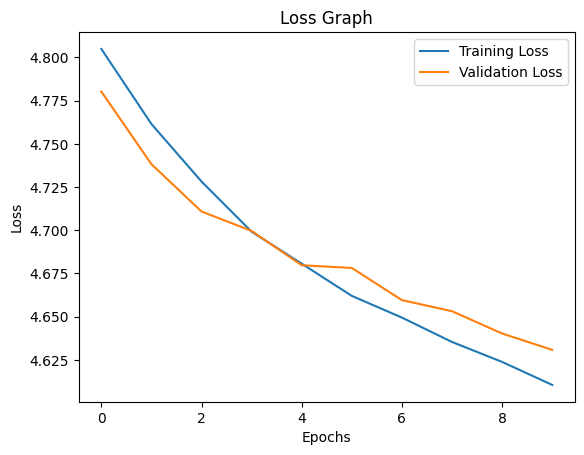

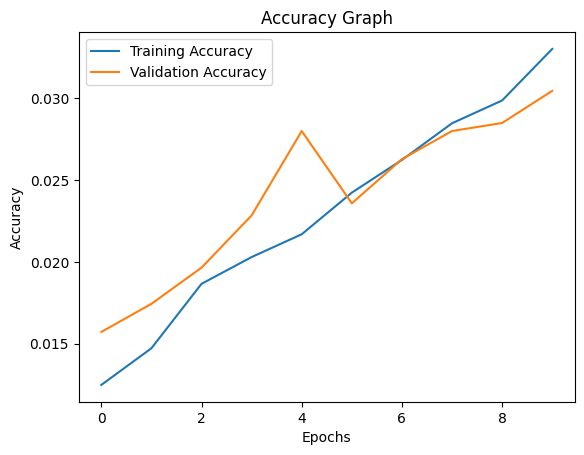

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Top-5 Predicted Classes for Image 1:  [  2 105  38  26   1]
Top-5 Predicted Classes for Image 2:  [88 66 96  1  5]
Top-5 Predicted Classes for Image 3:  [86 10 90 16 44]


In [7]:
import matplotlib.pyplot as plt

# Loss 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy 그래프
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 저장
model.save('stanford_dogs_resnet50.h5')

# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

model = load_model('stanford_dogs_resnet50.h5')

# 이미지 세 개에 대해 Top 5 예측
from tensorflow.keras.preprocessing import image
import numpy as np

# 이미지 불러오기 및 전처리 함수
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0

# 테스트 이미지 경로 설정
test_image_path1 = '/content/datasets/Stanford_dogs/test_img1.png'  # 테스트 1 경로
test_image_path2 = '/content/datasets/Stanford_dogs/test_img2.png'  # 테스트 2 경로
test_image_path3 = '/content/datasets/Stanford_dogs/test_img3.png'  # 테스트 3 경로

# 이미지 로드 및 전처리
test_img1 = load_and_preprocess_image(test_image_path1)
test_img2 = load_and_preprocess_image(test_image_path2)
test_img3 = load_and_preprocess_image(test_image_path3)

# 예측 수행
preds1 = model.predict(test_img1)
preds2 = model.predict(test_img2)
preds3 = model.predict(test_img3)

# Top-5 클래스 예측 결과
top5_preds1 = np.argsort(preds1[0])[-5:][::-1]
top5_preds2 = np.argsort(preds2[0])[-5:][::-1]
top5_preds3 = np.argsort(preds3[0])[-5:][::-1]

print("Top-5 Predicted Classes for Image 1: ", top5_preds1)
print("Top-5 Predicted Classes for Image 2: ", top5_preds2)
print("Top-5 Predicted Classes for Image 3: ", top5_preds3)